# Centroiding

MS instruments typically allow storing spectra in profile mode (several
data points per m/z peak) or in the more condensed centroid mode (one
data point per m/z peak). The process of converting a profile mass
spectrum into a centroided one is called peak centroiding or peak
picking.

<div style="background-color: #BDE5F8; margin: 10px 0px; padding:12px;"><p style="font-size: x-large"><i class="far fa-sticky-note"></i> <b>Note</b></p>

The term peak picking is ambiguous as it is also used for features
detection (i.e., 3D peak finding).

</div>

First, we load some profile data:

In [ ]:
from urllib.request import urlretrieve
import pyopenms as oms
import matplotlib.pyplot as plt

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/PeakPickerHiRes_input.mzML", "tutorial.mzML")

profile_spectra = oms.MSExperiment()
oms.MzMLFile().load("tutorial.mzML", profile_spectra)

Let's zoom in on an isotopic pattern in profile mode and plot it.

In [ ]:
plt.xlim(771.8, 774)  # zoom into isotopic pattern
plt.plot(
    profile_spectra[0].get_peaks()[0], profile_spectra[0].get_peaks()[1]
)  # plot the first spectrum

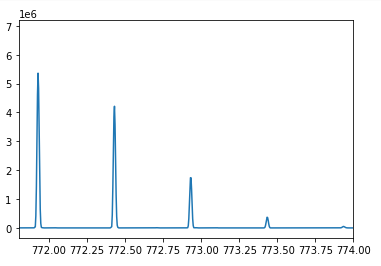

Because of the limited resolution of MS instruments m/z measurements are
not of unlimited precision. Consequently, peak shapes spreads in the m/z
dimension and resemble a gaussian distribution. Using the
[PeakPickerHiRes](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.PeakPickerHiRes.html)
algorithm, we can convert data from profile to centroided mode. Usually,
not much information is lost by storing only centroided data. Thus, many
algorithms and tools assume that centroided data is provided.

In [ ]:
centroided_spectra = oms.MSExperiment()

# input, output, chec_spectrum_type (if set, checks spectrum type and throws an exception if a centroided spectrum is passed)
oms.PeakPickerHiRes().pickExperiment(
    profile_spectra, centroided_spectra, True
)  # pick all spectra

plt.xlim(771.8, 774)  # zoom into isotopic pattern
plt.stem(
    centroided_spectra[0].get_peaks()[0], centroided_spectra[0].get_peaks()[1]
)  # plot as vertical lines

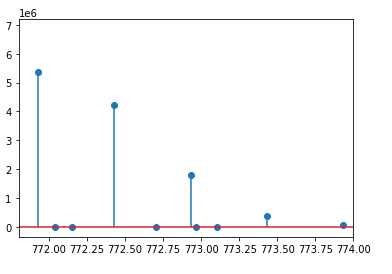

After centroiding, a single m/z value for every isotopic peak is
retained. By plotting the centroided data as stem plot we discover that
(in addition to the isotopic peaks) some low intensity peaks (intensity
at approx. 4k) were present in the profile data.